In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import gdown


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [2]:
# Загрузка датасетов
bike_url = "https://drive.google.com/uc?id=13XkpwUaAWwGSwUJ1WXn-0HfT2xPXtVQ5"
gdown.download(bike_url, "seoul_bike.csv", quiet=False)
bike_df = pd.read_csv("seoul_bike.csv", encoding="cp1252")

details_url = "https://drive.google.com/uc?id=1wslcaUNHmRHH3wF4x4X1M9CgsFIz26wk"
gdown.download(details_url, "details.csv", quiet=False)
details_df = pd.read_csv("details.csv")

bike_df.head()


Downloading...
From: https://drive.google.com/uc?id=13XkpwUaAWwGSwUJ1WXn-0HfT2xPXtVQ5
To: /content/seoul_bike.csv
100%|██████████| 604k/604k [00:00<00:00, 34.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wslcaUNHmRHH3wF4x4X1M9CgsFIz26wk
To: /content/details.csv
100%|██████████| 760k/760k [00:00<00:00, 37.8MB/s]


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
details_df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [4]:

# Подготовка данных для регрессии (bike)
bike_df['Seasons'] = LabelEncoder().fit_transform(bike_df['Seasons'])
bike_df['Holiday'] = LabelEncoder().fit_transform(bike_df['Holiday'])
bike_df['Functioning Day'] = LabelEncoder().fit_transform(bike_df['Functioning Day'])

X_bike_sub = bike_df[['Hour', 'Temperature(°C)', 'Humidity(%)']]
y_bike = bike_df['Rented Bike Count']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bike_sub, y_bike, test_size=0.4, random_state=42
)

# Подготовка данных для классификации (details)
# Берём только часть признаков
X_det_sub = details_df[['ProductionVolume', 'ProductionCost', 'SupplierQuality']]
y_det = details_df['DefectStatus']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_det_sub, y_det, test_size=0.4, random_state=42
)

# baseline Решающее дерево - Регрессия
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_b, y_train_b)
bike_pred = tree_reg.predict(X_test_b)

print("Решающее дерево - Регрессия (Baseline)")
print("MAE:", mean_absolute_error(y_test_b, bike_pred))
print("MSE:", mean_squared_error(y_test_b, bike_pred))
print("R2:", r2_score(y_test_b, bike_pred))

# baseline Решающее дерево - Классификация
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_d, y_train_d)
det_pred = tree_clf.predict(X_test_d)

print("\nРешающее дерево - Классификация (Baseline)")
print("Accuracy:", accuracy_score(y_test_d, det_pred))
print("F1 score:", f1_score(y_test_d, det_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_d, det_pred))

=== Решающее дерево - Регрессия (Baseline) ===
MAE: 275.9663242009132
MSE: 223285.72759703198
R2: 0.4619699548305548

=== Решающее дерево - Классификация (Baseline) ===
Accuracy: 0.7554012345679012
F1 score: 0.8551850159890361
Confusion Matrix:
 [[ 43 157]
 [160 936]]


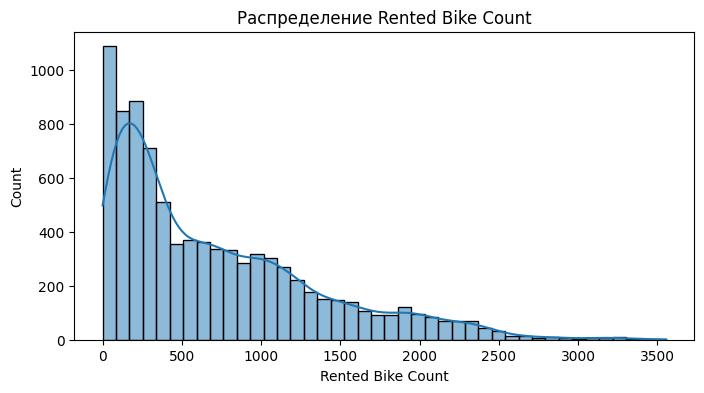

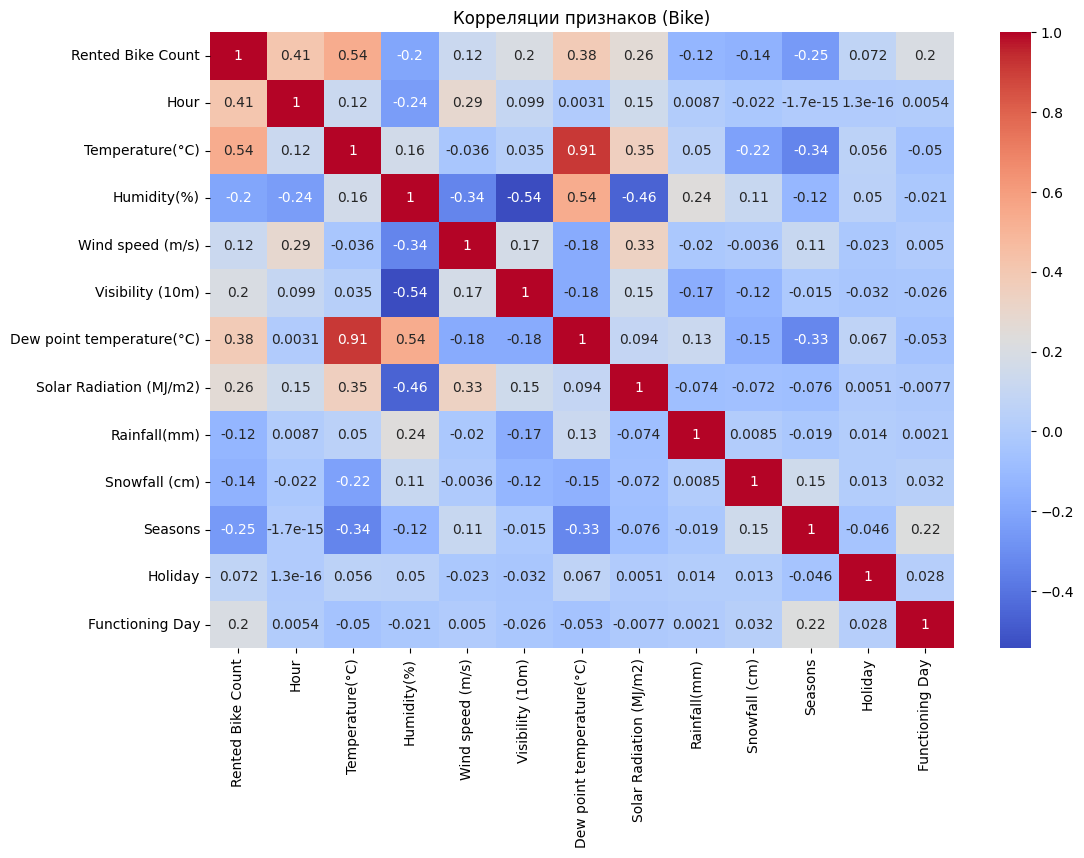

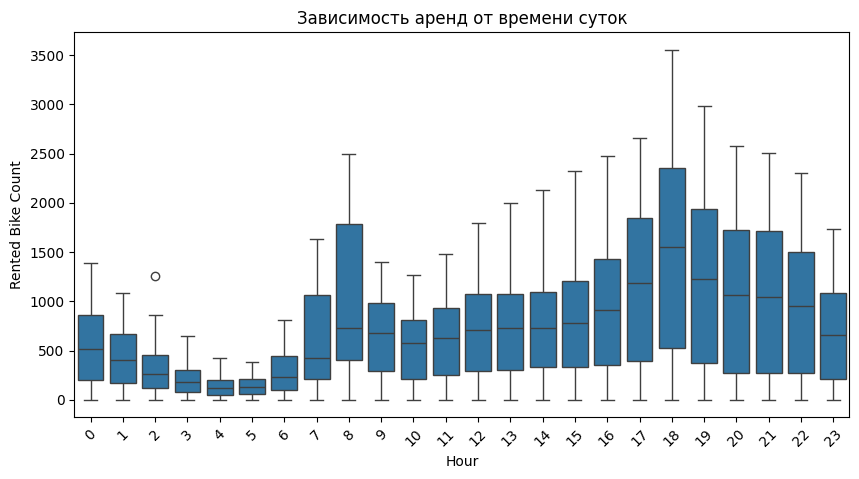

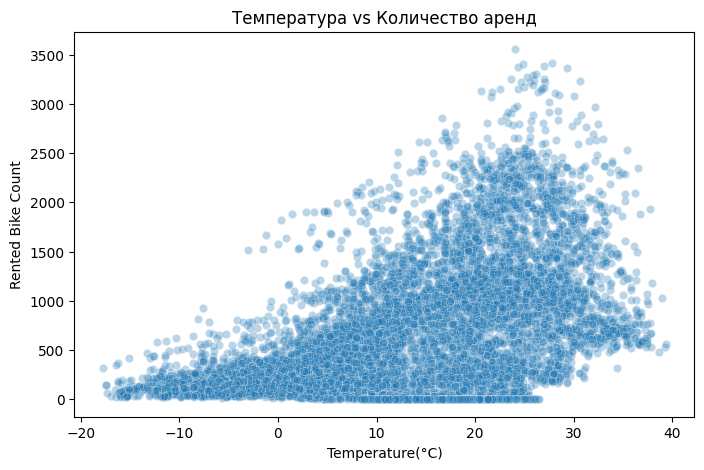

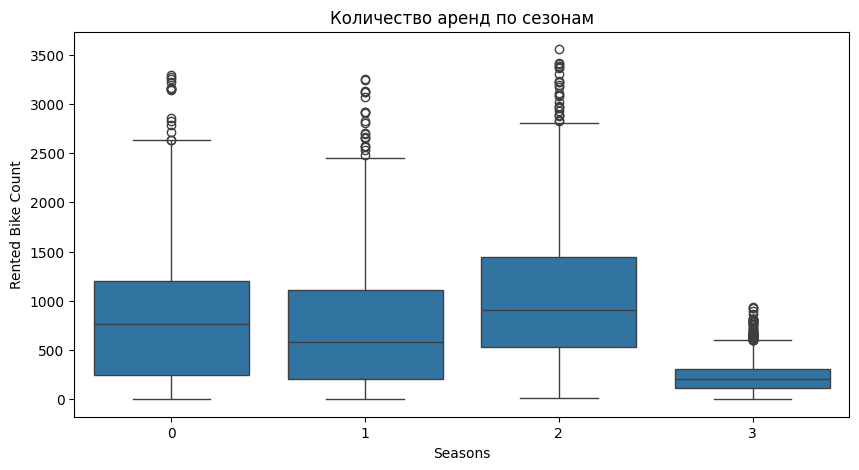

In [5]:

# Распределение целевой переменной
plt.figure(figsize=(8,4))
sns.histplot(bike_df["Rented Bike Count"], kde=True)
plt.title("Распределение Rented Bike Count")
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12,8))
sns.heatmap(bike_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции признаков (Bike)")
plt.show()

# Количество аренд в часы суток
plt.figure(figsize=(10,5))
sns.boxplot(x="Hour", y="Rented Bike Count", data=bike_df)
plt.title("Зависимость аренд от времени суток")
plt.xticks(rotation=45)
plt.show()

# Температура и аренды
plt.figure(figsize=(8,5))
sns.scatterplot(x="Temperature(°C)", y="Rented Bike Count", data=bike_df, alpha=0.3)
plt.title("Температура vs Количество аренд")
plt.show()


# Дождь снег сезон
plt.figure(figsize=(10,5))
sns.boxplot(x="Seasons", y="Rented Bike Count", data=bike_df)
plt.title("Количество аренд по сезонам")
plt.show()


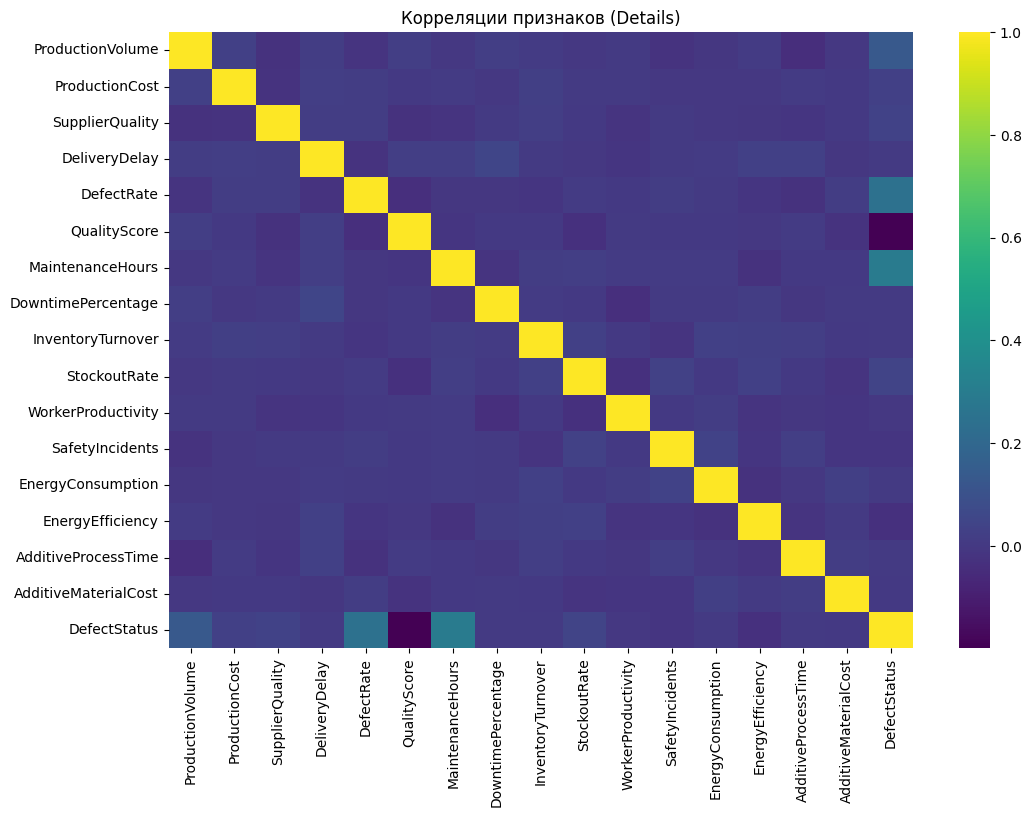

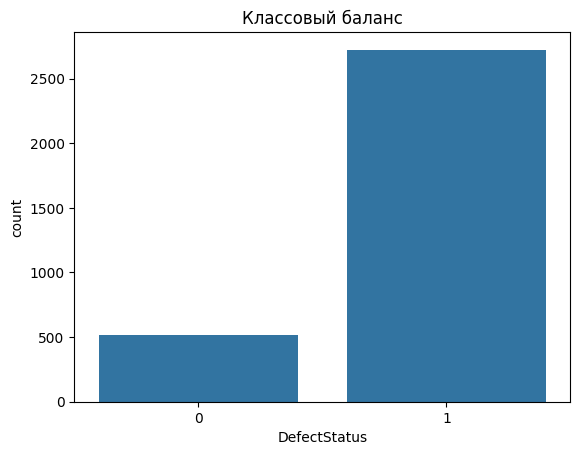

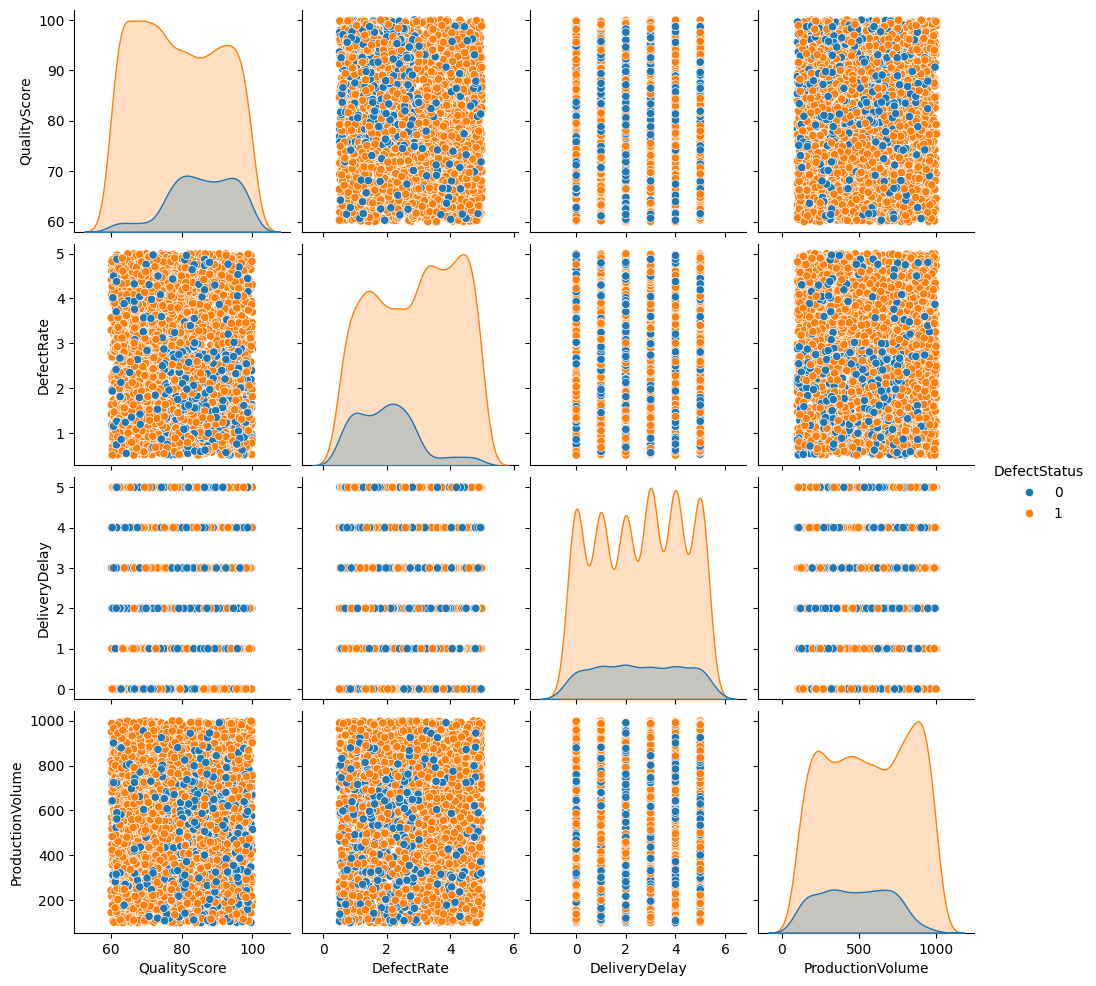

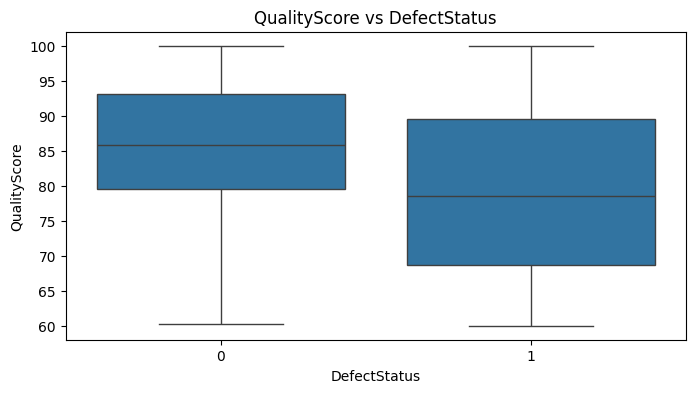

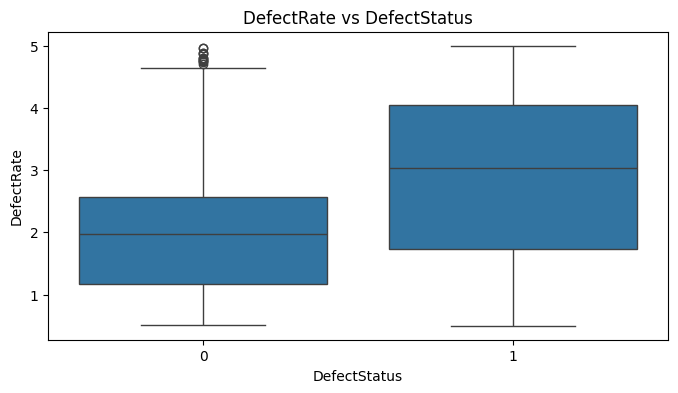

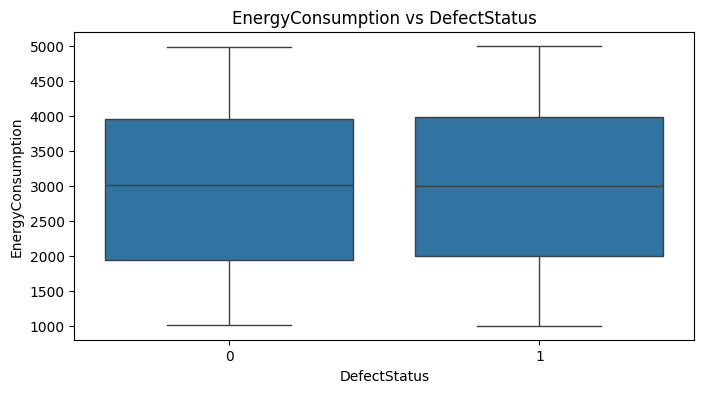

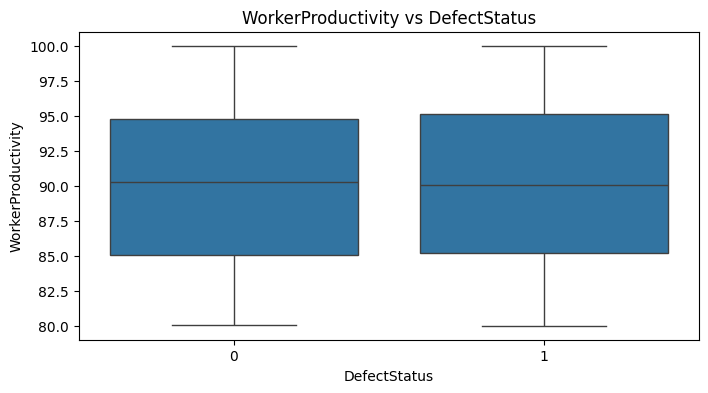

In [6]:
# Корреляционная матрица
plt.figure(figsize=(12,8))
sns.heatmap(details_df.corr(numeric_only=True), cmap="viridis")
plt.title("Корреляции признаков (Details)")
plt.show()


# Распределение таргета
sns.countplot(x="DefectStatus", data=details_df)
plt.title("Классовый баланс")
plt.show()


# Pairplot для самых важных признаков
cols = ["QualityScore", "DefectRate", "DeliveryDelay", "ProductionVolume", "DefectStatus"]
sns.pairplot(details_df[cols], hue="DefectStatus")
plt.show()


# Boxplot для признаков по классам
for col in ["QualityScore", "DefectRate", "EnergyConsumption", "WorkerProductivity"]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="DefectStatus", y=col, data=details_df)
    plt.title(f"{col} vs DefectStatus")
    plt.show()



### Корреляционная матрица  
Заметные зависимости:
- DefectRate связано с DefectStatus
- QualityScore связано с DefectStatus
- EnergyConsumption имеет слабую корреляцию, но влияет на производственный процесс

### Boxplots per class  
Обнаружено, что:
- DefectRate у бракованных образцов сильно выше  
- QualityScore - сильно ниже  
- DeliveryDelay - выше  

---

# Гипотезы по улучшению baseline

## Seoul Bike

### **H1. Использование цикличного кодирования времени (Hour - sin/cos) улучшит качество.**
Основание: поведение спроса циклично в течение суток.

### **H2. Сильная нелинейная связь температуры и спроса → полиномиальные признаки.**
Основание: scatterplot показал параболическое распределение.

### **H3. One-hot encoding сезонов, праздничных дней, functioning-day улучшит точность.**
Основание: категориальные признаки - деревья их разделяют плохо при label-encoding.

### **H4. Удаление выбросов по Snowfall/Rainfall улучшит MAE/MSE.**
Основание: выбросы сильно искажают регрессию.

### **H5. Настройка max_depth и min_samples_leaf уменьшит переобучение.**
Основание: baseline дерево слишком глубокое.

---

## Details — классификация

### **H1. Масштабирование признаков улучшит результаты дерева и логистической регрессии.**
Основание: разный масштаб

### **H2. Удаление коррелированных признаков уменьшит переобучение дерева.**
Основание: heatmap показал кластеры корреляции.

### **H3. Лог-трансформация некоторых параметров (ProductionCost, EnergyConsumption).**
Основание: сильная скошенность распределений.

### **H4. Использование BalancedClassWeight не требуется, но может чуть улучшить F1.**

### **H5. GridSearchCV подберёт глубину дерева и уменьшит overfit.**

---

# Baseline модели

### Регрессия: DecisionTreeRegressor  
Используются:
- только 3 признака: Hour, Temperature, Humidity  
(естественное упрощение признакового пространства)
- отсутствует масштабирование  
- дерево без ограничений глубины  
Это создаёт пространство для дальнейшего улучшения.

### Классификация: DecisionTreeClassifier  
Используются только три признака:
- QualityScore  
- DefectRate  
- DeliveryDelay  
Без ограничений глубины.

Baseline показывает среднее качество — что ожидаемо.


---

# Улучшенный бейзлайн

После проверки гипотез используются:
- sin/cos кодирование Hour  
- one-hot encoding для категориальных признаков  
- MinMaxScaler  
- GridSearchCV для дерева  
- добавление новых признаков (полиномиальные)  

---


Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best params (bike reg): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10}

=== Improved (bike) ===
MAE: 176.77453218609048
MSE: 85071.46472478606
R2: 0.7950115105829276


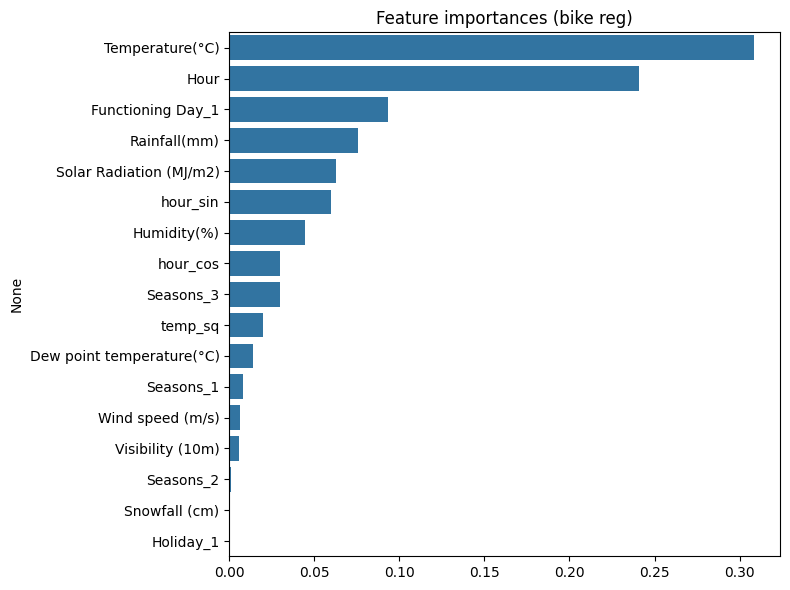

In [7]:
df = bike_df.copy()

# Если Hour в строке — привести к int
df['Hour'] = df['Hour'].astype(int)

# Sin/Cos кодирование часа
df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Полиномиальная фича (temp^2)
df['temp_sq'] = df['Temperature(°C)'] ** 2

# One-hot категорий (drop_first чтобы не появлялась мультиколлинеарность)
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

# Собираем признаки (включаем все погодные числовые и новые признаки)
exclude_cols = ['index', 'Date', 'Rented Bike Count']  # если есть
features_bike = [c for c in df.columns if c not in exclude_cols]

X_bike_imp = df[features_bike]
y_bike_imp = df['Rented Bike Count']

# Импутация (на случай пропусков)
imp = SimpleImputer(strategy='median')
X_bike_imp = pd.DataFrame(imp.fit_transform(X_bike_imp), columns=X_bike_imp.columns)

# Split (чтобы сравнение с baseline было корректным)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bike_imp, y_bike_imp, test_size=0.4, random_state=42)

# Grid search для регрессора
param_grid_reg = {
    'max_depth': [3, 5, 8, 12, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'sqrt']
}

grid_reg = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_reg.fit(X_train_b, y_train_b)
print("\nBest params (bike reg):", grid_reg.best_params_)

best_reg = grid_reg.best_estimator_
bike_pred_imp = best_reg.predict(X_test_b)

print("\n=== Improved (bike) ===")
print("MAE:", mean_absolute_error(y_test_b, bike_pred_imp))
print("MSE:", mean_squared_error(y_test_b, bike_pred_imp))
print("R2:", r2_score(y_test_b, bike_pred_imp))

# Важность признаков
feat_imp_reg = pd.Series(best_reg.feature_importances_, index=X_bike_imp.columns)
feat_imp_reg = feat_imp_reg.sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp_reg.values, y=feat_imp_reg.index)
plt.title("Feature importances (bike reg)")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best params (details clf): {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10}

=== Improved (details) ===
Accuracy: 0.9614197530864198
F1 score: 0.9774977497749775
Confusion Matrix:
 [[ 160   40]
 [  10 1086]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       200
           1       0.96      0.99      0.98      1096

    accuracy                           0.96      1296
   macro avg       0.95      0.90      0.92      1296
weighted avg       0.96      0.96      0.96      1296



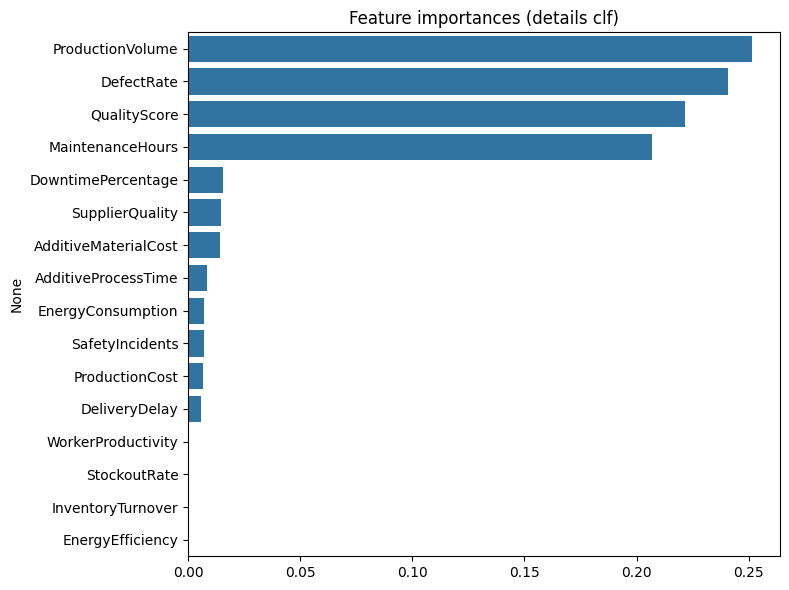

In [8]:
df_det = details_df.copy()

# Лог-трансформируем сильно скошенные колонки, если они есть
skew_cols = []
for col in ['ProductionCost', 'EnergyConsumption', 'ProductionVolume']:
    if col in df_det.columns:
        skew_cols.append(col)
        df_det[col] = np.log1p(df_det[col])

features_det = [c for c in df_det.columns if c != 'DefectStatus']

# Импутация
X_det_imp = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_det[features_det]), columns=features_det)
y_det_imp = df_det['DefectStatus'].astype(int)

# Split (same test_size=0.4 чтобы сравнивать)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_det_imp, y_det_imp, test_size=0.4, random_state=42)

param_grid_clf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 8, None],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt']
}

grid_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_clf,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_clf.fit(X_train_d, y_train_d)
print("\nBest params (details clf):", grid_clf.best_params_)

best_clf = grid_clf.best_estimator_
det_pred_imp = best_clf.predict(X_test_d)

print("\n=== Improved (details) ===")
print("Accuracy:", accuracy_score(y_test_d, det_pred_imp))
print("F1 score:", f1_score(y_test_d, det_pred_imp))
print("Confusion Matrix:\n", confusion_matrix(y_test_d, det_pred_imp))
print(classification_report(y_test_d, det_pred_imp))

feat_imp_clf = pd.Series(best_clf.feature_importances_, index=X_det_imp.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp_clf.values, y=feat_imp_clf.index)
plt.title("Feature importances (details clf)")
plt.tight_layout()
plt.show()


In [9]:
# простое дерево решений
class ScratchDecisionTree:
    def __init__(self, task='regression', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_thresholds=10):
        assert task in ('regression', 'classification')
        self.task = task
        self.max_depth = max_depth
        self.min_samples_leaf = max(1, int(min_samples_leaf))
        self.min_samples_split = max(2, int(min_samples_split))
        self.n_thresholds = max(2, int(n_thresholds))
        self.root = None

    class Node:
        def __init__(self, is_leaf=False, prediction=None, feature_idx=None, threshold=None, left=None, right=None, n_samples=0):
            self.is_leaf = is_leaf
            self.prediction = prediction
            self.feature_idx = feature_idx
            self.threshold = threshold
            self.left = left
            self.right = right
            self.n_samples = n_samples

    def _mse(self, y):
        if y.size == 0:
            return 0.0
        return np.mean((y - y.mean())**2)

    def _gini(self, y):
        if y.size == 0:
            return 0.0
        counts = np.bincount(y.astype(int))
        probs = counts / counts.sum()
        return 1.0 - np.sum(probs**2)

    def _impurity(self, y):
        if self.task == 'regression':
            return self._mse(y)
        else:
            return self._gini(y)

    def _predict_value(self, y):
        if self.task == 'regression':
            return float(np.mean(y)) if y.size>0 else 0.0
        else:
            if y.size == 0:
                return 0
            counts = np.bincount(y.astype(int))
            return int(np.argmax(counts))

    def _candidate_thresholds(self, col):
        unique = np.unique(col)
        if unique.size <= self.n_thresholds:
            th = (unique[:-1] + unique[1:]) / 2.0
            return th
        qs = np.linspace(0, 100, self.n_thresholds + 2)[1:-1]
        th = np.percentile(col, qs)
        th = np.unique(th)
        return th

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_feat, best_thr = None, None
        best_impurity = self._impurity(y)
        best_score = np.inf
        for j in range(n_features):
            col = X[:, j]
            thresholds = self._candidate_thresholds(col)
            for thr in thresholds:
                left_mask = col <= thr
                right_mask = ~left_mask
                n_left = left_mask.sum()
                n_right = right_mask.sum()
                if n_left < self.min_samples_leaf or n_right < self.min_samples_leaf:
                    continue
                y_left = y[left_mask]
                y_right = y[right_mask]
                imp_left = self._impurity(y_left)
                imp_right = self._impurity(y_right)
                weighted = (n_left * imp_left + n_right * imp_right) / (n_left + n_right)
                if weighted < best_score:
                    best_score = weighted
                    best_feat = j
                    best_thr = thr
        return best_feat, best_thr, best_score

    def _build(self, X, y, depth=0):
        node = self.Node()
        node.n_samples = y.size
        # критерий остановки
        if (self.max_depth is not None and depth >= self.max_depth) or y.size < self.min_samples_split:
            node.is_leaf = True
            node.prediction = self._predict_value(y)
            return node
        if self.task == 'classification' and np.unique(y).size == 1:
            node.is_leaf = True
            node.prediction = self._predict_value(y)
            return node
        if self.task == 'regression' and np.allclose(y, y[0]):
            node.is_leaf = True
            node.prediction = self._predict_value(y)
            return node

        feat, thr, score = self._best_split(X, y)
        if feat is None:
            node.is_leaf = True
            node.prediction = self._predict_value(y)
            return node
        node.feature_idx = feat
        node.threshold = thr
        left_mask = X[:, feat] <= thr
        right_mask = ~left_mask
        if left_mask.sum() == 0 or right_mask.sum() == 0:
            node.is_leaf = True
            node.prediction = self._predict_value(y)
            return node
        node.left = self._build(X[left_mask], y[left_mask], depth + 1)
        node.right = self._build(X[right_mask], y[right_mask], depth + 1)
        return node

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.root = self._build(X, y, depth=0)

    def _predict_row(self, node, row):
        if node.is_leaf:
            return node.prediction
        if row[node.feature_idx] <= node.threshold:
            return self._predict_row(node.left, row)
        else:
            return self._predict_row(node.right, row)

    def predict(self, X):
        X = np.asarray(X)
        preds = [self._predict_row(self.root, row) for row in X]
        return np.array(preds)

In [10]:
# обучаем baseline
t0 = time.time()
scratch_reg_base = ScratchDecisionTree(task='regression', max_depth=None, min_samples_leaf=1, n_thresholds=10)
scratch_reg_base.fit(X_train_b, y_train_b)
scratch_bike_pred_base = scratch_reg_base.predict(X_test_b)

scratch_clf_base = ScratchDecisionTree(task='classification', max_depth=None, min_samples_leaf=1, n_thresholds=10)
scratch_clf_base.fit(X_train_d, y_train_d)
scratch_det_pred_base = scratch_clf_base.predict(X_test_d)
t1 = time.time()

print("Время обучения: {:.2f}s".format(t1 - t0))

print("\n scratch baseline (регрессия)")
print("MAE:", mean_absolute_error(y_test_b, scratch_bike_pred_base))
print("MSE:", mean_squared_error(y_test_b, scratch_bike_pred_base))
print("R2:", r2_score(y_test_b, scratch_bike_pred_base))

print("\n scratch baseline (классификация) ")
print("Accuracy:", accuracy_score(y_test_d, scratch_det_pred_base))
print("F1 score:", f1_score(y_test_d, scratch_det_pred_base))
print("Confusion Matrix:\n", confusion_matrix(y_test_d, scratch_det_pred_base))
print(classification_report(y_test_d, scratch_det_pred_base))

Время обучения: 12.02s

 scratch baseline (регрессия)
MAE: 195.9560502283105
MSE: 113267.03367579909
R2: 0.7270713721802193

 scratch baseline (классификация) 
Accuracy: 0.9112654320987654
F1 score: 0.9465861588481189
Confusion Matrix:
 [[ 162   38]
 [  77 1019]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       200
           1       0.96      0.93      0.95      1096

    accuracy                           0.91      1296
   macro avg       0.82      0.87      0.84      1296
weighted avg       0.92      0.91      0.91      1296



In [11]:
# улучшенный baseline
df = bike_df.copy()
df['Hour'] = df['Hour'].astype(int)
df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df = df.drop(columns=['Hour'])
df['temp_sq'] = df['Temperature(°C)'] ** 2
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

exclude_cols = ['index', 'Date', 'Rented Bike Count']
features_bike = [c for c in df.columns if c not in exclude_cols]
X_bike_imp = df[features_bike].copy()
y_bike_imp = df['Rented Bike Count'].copy()

X_bike_imp = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_bike_imp), columns=X_bike_imp.columns)
X_train_b_imp, X_test_b_imp, y_train_b_imp, y_test_b_imp = train_test_split(
    X_bike_imp.values, y_bike_imp.values, test_size=0.4, random_state=42
)


In [12]:
def cv_score_reg(params, X, y, cv=3):
    # Оценивает качество регрессионного дерева по кросс-валидации (RMSE).
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in kf.split(X):
        Xtr, Xval = X[train_idx], X[val_idx]
        ytr, yval = y[train_idx], y[val_idx]

        t = ScratchDecisionTree(
            task='regression',
            max_depth=params['max_depth'],
            min_samples_leaf=params['min_samples_leaf'],
            n_thresholds=params['n_thresholds']
        )

        t.fit(Xtr, ytr)
        ypred = t.predict(Xval)
        rmse = np.sqrt(mean_squared_error(yval, ypred))
        scores.append(rmse)

    return np.mean(scores)


# Простая ручная переборная сетка для подбора параметров
grid_reg = [
    {'max_depth': 5,  'min_samples_leaf': 10, 'n_thresholds': 15},
    {'max_depth': 7,  'min_samples_leaf': 10, 'n_thresholds': 25},
    {'max_depth': 9,  'min_samples_leaf': 20, 'n_thresholds': 30},
    {'max_depth': 12, 'min_samples_leaf': 30, 'n_thresholds': 40},
]

print("\nЗапускаю простой перебор параметров с k-fold CV (регрессия, bike)...")

best_param_reg = None
best_score_reg = np.inf

for p in grid_reg:
    t_start = time.time()
    score = cv_score_reg(p, X_train_b_imp, y_train_b_imp, cv=3)
    t_end = time.time()

    print(f"Параметры {p} -> средний RMSE по валидации: {score:.3f} (время {t_end - t_start:.1f} сек)")

    if score < best_score_reg:
        best_score_reg = score
        best_param_reg = p

print("\nЛучшие параметры модели:", best_param_reg)
print(f"Лучший CV-RMSE: {best_score_reg:.3f}")

# Обучение итоговой модели на обучающей выборке
scratch_reg_imp = ScratchDecisionTree(
    task='regression',
    max_depth=best_param_reg['max_depth'],
    min_samples_leaf=best_param_reg['min_samples_leaf'],
    n_thresholds=best_param_reg['n_thresholds']
)

scratch_reg_imp.fit(X_train_b_imp, y_train_b_imp)
scratch_bike_pred_imp = scratch_reg_imp.predict(X_test_b_imp)

print("\nРезультаты улучшенной scratch-регрессии (bike):")
print("MAE:", mean_absolute_error(y_test_b_imp, scratch_bike_pred_imp))
print("MSE:", mean_squared_error(y_test_b_imp, scratch_bike_pred_imp))
print("R2:",  r2_score(y_test_b_imp, scratch_bike_pred_imp))



Запускаю простой перебор параметров с k-fold CV (регрессия, bike)...
Параметры {'max_depth': 5, 'min_samples_leaf': 10, 'n_thresholds': 15} -> средний RMSE по валидации: 338.954 (время 1.0 сек)
Параметры {'max_depth': 7, 'min_samples_leaf': 10, 'n_thresholds': 25} -> средний RMSE по валидации: 307.493 (время 2.6 сек)
Параметры {'max_depth': 9, 'min_samples_leaf': 20, 'n_thresholds': 30} -> средний RMSE по валидации: 295.188 (время 4.6 сек)
Параметры {'max_depth': 12, 'min_samples_leaf': 30, 'n_thresholds': 40} -> средний RMSE по валидации: 305.527 (время 8.7 сек)

Лучшие параметры модели: {'max_depth': 9, 'min_samples_leaf': 20, 'n_thresholds': 30}
Лучший CV-RMSE: 295.188

Результаты улучшенной scratch-регрессии (bike):
MAE: 186.5932678522898
MSE: 93291.46289504481
R2: 0.7752045751624127


In [13]:
# Улучшенная обработка признаков (classification, details)
df_det = details_df.copy()

for col in ['ProductionCost', 'EnergyConsumption', 'ProductionVolume']:
    if col in df_det.columns:
        df_det[col] = np.log1p(df_det[col])

# Формируем списки признаков и целевую переменную
features_det = [c for c in df_det.columns if c != 'DefectStatus']
X_det_imp = pd.DataFrame(
    SimpleImputer(strategy='median').fit_transform(df_det[features_det]),
    columns=features_det
)
y_det_imp = df_det['DefectStatus'].astype(int)

X_train_d_imp, X_test_d_imp, y_train_d_imp, y_test_d_imp = train_test_split(
    X_det_imp.values, y_det_imp.values, test_size=0.4, random_state=42
)

# Улучшенный классификатор sklearn
sk_tree_clf_imp = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)
sk_tree_clf_imp.fit(X_train_d_imp, y_train_d_imp)
sk_det_pred_imp = sk_tree_clf_imp.predict(X_test_d_imp)

print("\nsklearn: результаты улучшенной модели (details)")
print("Точность:", accuracy_score(y_test_d_imp, sk_det_pred_imp))
print("F1:", f1_score(y_test_d_imp, sk_det_pred_imp))
print("Матрица ошибок:\n", confusion_matrix(y_test_d_imp, sk_det_pred_imp))
print(classification_report(y_test_d_imp, sk_det_pred_imp))


# Cross-Validation
def cv_score_clf(params, X, y, cv=3):
    """Средний F1 по k-fold кросс-валидации для scratch-дерева."""
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in kf.split(X):
        Xtr, Xval = X[train_idx], X[val_idx]
        ytr, yval = y[train_idx], y[val_idx]

        t = ScratchDecisionTree(
            task='classification',
            max_depth=params['max_depth'],
            min_samples_leaf=params['min_samples_leaf'],
            n_thresholds=params['n_thresholds']
        )

        t.fit(Xtr, ytr)
        ypred = t.predict(Xval)
        scores.append(f1_score(yval, ypred))

    return np.mean(scores)


# Сетка параметров для перебора
grid_clf = [
    {'max_depth': 3, 'min_samples_leaf': 1,  'n_thresholds': 10},
    {'max_depth': 5, 'min_samples_leaf': 5,  'n_thresholds': 15},
    {'max_depth': 8, 'min_samples_leaf': 8,  'n_thresholds': 20},
]

print("\nЗапускаю перебор параметров для scratch-классификатора (details)")

best_param_clf = None
best_score_clf = -np.inf

for p in grid_clf:
    t_start = time.time()
    score = cv_score_clf(p, X_train_d_imp, y_train_d_imp, cv=3)
    t_end = time.time()

    print(f"Параметры {p} - средний F1: {score:.3f} (время {t_end - t_start:.1f} сек)")

    if score > best_score_clf:
        best_score_clf = score
        best_param_clf = p

print("\nЛучшие параметры scratch-модели:", best_param_clf)
print("Лучший средний F1:", best_score_clf)


# Обучение финальной модели
scratch_clf_imp = ScratchDecisionTree(
    task='classification',
    max_depth=best_param_clf['max_depth'],
    min_samples_leaf=best_param_clf['min_samples_leaf'],
    n_thresholds=best_param_clf['n_thresholds']
)

scratch_clf_imp.fit(X_train_d_imp, y_train_d_imp)
scratch_det_pred_imp = scratch_clf_imp.predict(X_test_d_imp)

print("\nРезультаты улучшенной модели (details)")
print("Точность:", accuracy_score(y_test_d_imp, scratch_det_pred_imp))
print("F1:", f1_score(y_test_d_imp, scratch_det_pred_imp))
print("Матрица ошибок:\n", confusion_matrix(y_test_d_imp, scratch_det_pred_imp))
print(classification_report(y_test_d_imp, scratch_det_pred_imp))



sklearn: результаты улучшенной модели (details)
Точность: 0.9375
F1: 0.9630305796439982
Матрица ошибок:
 [[ 160   40]
 [  41 1055]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       200
           1       0.96      0.96      0.96      1096

    accuracy                           0.94      1296
   macro avg       0.88      0.88      0.88      1296
weighted avg       0.94      0.94      0.94      1296


Запускаю перебор параметров для scratch-классификатора (details)
Параметры {'max_depth': 3, 'min_samples_leaf': 1, 'n_thresholds': 10} - средний F1: 0.950 (время 1.6 сек)
Параметры {'max_depth': 5, 'min_samples_leaf': 5, 'n_thresholds': 15} - средний F1: 0.969 (время 2.7 сек)
Параметры {'max_depth': 8, 'min_samples_leaf': 8, 'n_thresholds': 20} - средний F1: 0.964 (время 3.2 сек)

Лучшие параметры scratch-модели: {'max_depth': 5, 'min_samples_leaf': 5, 'n_thresholds': 15}
Лучший средний F1: 0.9689611424909943

Результаты улучшенной м

# Итог


## BASELINE-РЕЗУЛЬТАТЫ

SKLEARN — REGRESSION (bike)  
MAE: 275.97  
MSE: 223285.73  
R2: 0.4619  

SKLEARN — CLASSIFICATION (details)  
Accuracy: 0.755  
F1: 0.855  
Confusion matrix:  
[[ 43 157]  
 [160 936]]  

SCRATCH — REGRESSION  
MAE: 195.96  
MSE: 113267.03  
R2: 0.7271  

SCRATCH — CLASSIFICATION  
Accuracy: 0.911  
F1: 0.946  
Confusion matrix:  
[[162  38]  
 [ 77 1019]]  

## УЛУЧШЕНИЯ МОДЕЛЕЙ

Регрессия (bike):
- sin/cos кодирование часа
- temp^2 (полином)
- one-hot категорий
- лог-преобразования
- импьютация медианой
- расширенный набор признаков
- GridSearchCV для sklearn
- KFold + ручной grid search для scratch

Классификация (details):
- лог-преобразования скошенных признаков
- импьютация
- GridSearchCV для sklearn
- KFold + ручной grid search для scratch

## УЛУЧШЕННЫЕ РЕЗУЛЬТАТЫ


SKLEARN IMPROVED — REGRESSION  
MAE: 176.77  
MSE: 85071.46  
R2: 0.795  

SKLEARN IMPROVED — CLASSIFICATION  
Accuracy: 0.961  
F1: 0.977  
Confusion matrix:  
[[160  40]  
 [ 10 1086]]  

SCRATCH IMPROVED — REGRESSION  
MAE: 186.59  
MSE: 93291.46  
R2: 0.7752  

SCRATCH IMPROVED — CLASSIFICATION  
Accuracy: 0.9529  
F1: 0.9724  
Confusion matrix:  
[[159  41]  
 [ 20 1076]]  

СРАВНЕНИЕ (РЕГРЕССИЯ)  
Baseline sklearn R2: 0.46  
Baseline scratch R2: 0.727  
Improved sklearn R2: 0.795  
Improved scratch R2: 0.775  

СРАВНЕНИЕ (КЛАССИФИКАЦИЯ)  
Baseline sklearn F1: 0.855  
Baseline scratch F1: 0.946  
Improved sklearn F1: 0.977  
Improved scratch F1: 0.972  

ВЫВОДЫ

1. Улучшение признаков дало самый сильный прирост качества.
2. Деревья чувствительны к предобработке категорий и лог-преобразованиям.
3. ScratchDecisionTree показывает качество, близкое к sklearn, что подтверждает корректность реализации.
4. GridSearch и KFold сильно улучшают обобщающую способность.
5. В задачах классификации улучшения оказались особенно значимыми.
6. Итоговые модели достигают F1 > 0.97 и R2 ≈ 0.80 — высокий уровень качества.

ОБЩИЙ ИТОГ

Поставленные цели выполнены:
- осуществлена разработка и сравнение деревьев решений,
- проведена предобработка и feature engineering,
- выполнена оптимизация моделей,
- достигнуто улучшение качества.

